# 图像局部特征-斑点检测LOG算子

In [22]:
#coding:utf-8
%matplotlib  inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)

In [14]:
def gen_hog_kernel(ksize,sigma):
    kernel = np.zeros((ksize,ksize),dtype=np.float64)
    center = (ksize - 1) // 2
    
    for i in range(ksize):
        for j in range(ksize):
            param = -((i - center) * (i - center) + (j - center) * (j - center)) / (2*sigma*sigma)
            kernel[i,j] = np.exp(param)
    eps = 1.0e-5
    max_value = cv2.minMaxLoc(kernel)
    max_value = max_value[1]
    for i in range(ksize):
        for j in range(ksize):
            if kernel[i,j] < eps * max_value:
                kernel[i,j] = 0
    sum_kernel = np.sum(kernel)
    if sum_kernel != 0:
        kernel = kernel / sum_kernel
        
    for i in range(ksize):
        for j in range(ksize):
            addition = addition = ((i - center) * (i - center) + (j - center) * (j - center) - 2*sigma*sigma)/(sigma*sigma*sigma*sigma)
            kernel[i,j] *= addition
    sum_kernel = np.sum(kernel)
    kernel -= (sum_kernel) / (ksize * ksize)
    return kernel

In [21]:
kernel = gen_hog_kernel(5,1.5)

In [16]:
dst = cv2.filter2D(gray.astype(np.float32),-1,kernel)

In [18]:
dst = dst * 255
dst[dst < 0] = 0
dst[dst > 255] = 255
dst = dst.astype(np.uint8)

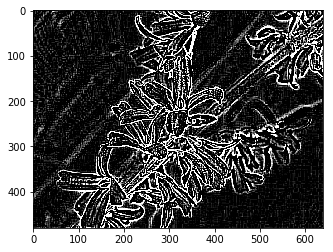

In [20]:
plt.imshow(dst,'gray')

## 斑点检测

In [23]:
src = cv2.cvtColor(cv2.imread('../datas/f6.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f6.jpg',0)

In [26]:
#detector = cv2.SimpleBlobDetector()
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(gray)
img_keypoints = cv2.drawKeypoints(src,keypoints,np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

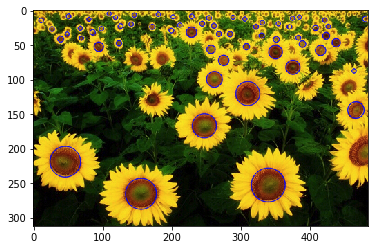

In [27]:
plt.imshow(img_keypoints)